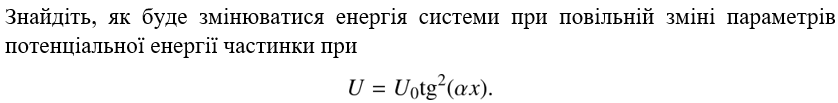

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

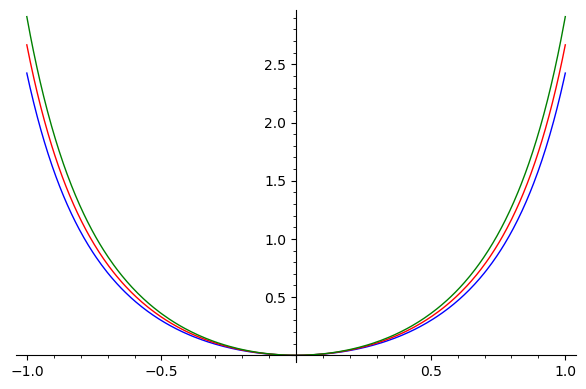

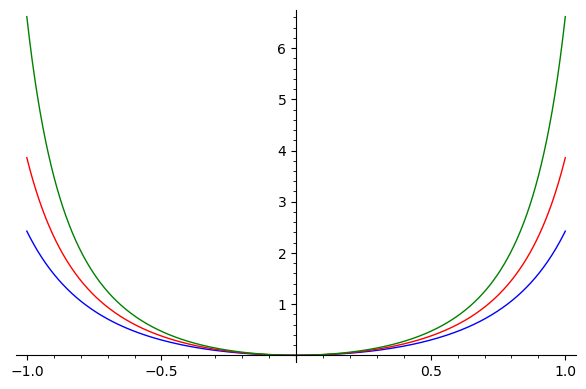

In [2]:
# Объявление переменных и функций

U_0 = var("U_0")
m,t = var("m,t")

V = var("v")
v = function("v")(t)

X = var("x")
x = function("x")(t)

P = var("p")
p = function("p")(t)

Alpha = var("alpha")
alpha = function("alpha")(t)

In [3]:
# Кинетическая энергия в координатах x

Tx = (1/2) * m*((x.diff(t))^2)
disp(Tx)

<IPython.core.display.Math object>

In [4]:
# Кинетическая энергия в координатах p

Tp = (1/2) * ((P)^2) / m
disp(Tp)

<IPython.core.display.Math object>

In [5]:
# уравнения замены производных обобщенных координат на v

subs_to_v      = [x.diff(t) == V]
subs_to_v_func = [x.diff(t) == v]

In [6]:
# уравнения замены производных обобщенных координат на p

subs_to_p      = [x.diff(t) == P/m]
subs_to_p_func = [x.diff(t) == p/m]

In [7]:
# Потенциальная энергия в координатах x

U = U_0 * tan(alpha * x)^2

disp(U)

<IPython.core.display.Math object>

In [8]:
# Лагранжиан

L = Tx - U
disp(L)

<IPython.core.display.Math object>

In [9]:
# Гамильтониан

H = Tp + U
disp(H)

<IPython.core.display.Math object>

In [10]:
# в Лагранжиане производим замену производных обобщенных координат на v

L = L.subs(subs_to_v)
disp(L)

<IPython.core.display.Math object>

Найдем обобщенные импульсы

$P = \frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial {v}}$

In [11]:
P1 = L.diff(V).subs(V == v)
disp(P1)

<IPython.core.display.Math object>

Найдем обобщенные силы

$\frac{\partial L}{\partial {x}} = F$

In [12]:
F1 = L.subs(x == X).diff(X).subs(X == x)#.subs(subs_to_v_func)
disp(F1)

<IPython.core.display.Math object>

Запишем уравнения Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial {x}} = 0$

In [13]:
de1 = P1.diff(t) - F1 == 0
disp(de1)

<IPython.core.display.Math object>

In [14]:
disp(de1.full_simplify().expand())

<IPython.core.display.Math object>

Выразим энергию через Лагранжиан

$E = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - L$

In [15]:
E = P1 * v - L
disp (E)

<IPython.core.display.Math object>

In [16]:
E = E.subs(v == V, x == X)
disp(E)

<IPython.core.display.Math object>

In [17]:
# Объявление переменных - обобщенные импульсы

p_1, p_2 = var ("p_1, p_2")

In [18]:
# Записываем уравнения выражающие обобщенные импульсы
# через производные Лагранжиана по скорости изменения обобщенной координаты (по v)

eq_p_v = [p_1 == L.diff(V)]
disp(eq_p_v[0])

<IPython.core.display.Math object>

In [19]:
# Ищем выражение для omega через обобщенные импульсы, решая вышесозданную систему уравнений

sol_v_p = solve(eq_p_v, [V])
disp(sol_v_p)

<IPython.core.display.Math object>

In [20]:
E = E.subs(sol_v_p)
disp(E)

<IPython.core.display.Math object>

In [21]:
# Находим выражение для Гамильтониана исходя из
# выражения энергии через Лагранжиан
# используя вышенайденную подстановку, выражающую omega через обобщенные импульсы и координаты

H = (p_1 * V - L).subs(sol_v_p).subs(x == X)
disp(H)

<IPython.core.display.Math object>

Записываем уравнения Гамильтона

$\dot{p}_i = - \frac{\partial H}{\partial q_i}$

$\dot{q}_i = \frac{\partial H}{\partial p_i}$

In [22]:
dot_p1 = - H.diff(X)
dot_x1 =   H.diff(p_1)

In [23]:
disp(dot_p1)

<IPython.core.display.Math object>

In [24]:
disp(dot_x1)

<IPython.core.display.Math object>

In [25]:
# полученные уравнения Гамильтона обьединяем в систему из 2 уравнений
des = [dot_p1, dot_x1]
disp(des)

<IPython.core.display.Math object>

In [26]:
alpha_subs = alpha == 1 + 0.1 * t
alpha_subs

alpha(t) == 0.100000000000000*t + 1

In [27]:
values = [U_0 == 1, m == 1, alpha_subs]
values

[U_0 == 1, m == 1, alpha(t) == 0.100000000000000*t + 1]

In [28]:
E_subs = E.subs(values)
E_subs

1/2*p_1^2 + tan((0.100000000000000*t + 1)*x)^2

In [29]:
# в которой делаем подстановку численных значений масс, длин и ускорения свободного падения
f = [de_i.subs(values) for de_i in des]
disp(f)

<IPython.core.display.Math object>

In [30]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times = srange(0, 1.11, 0.01)

sol = desolve_odeint(des=f, ics=[5,0], times=times, dvars=[p_1, X], ivar=t)

# Построение фазовых диаграмм ($v(p)$)

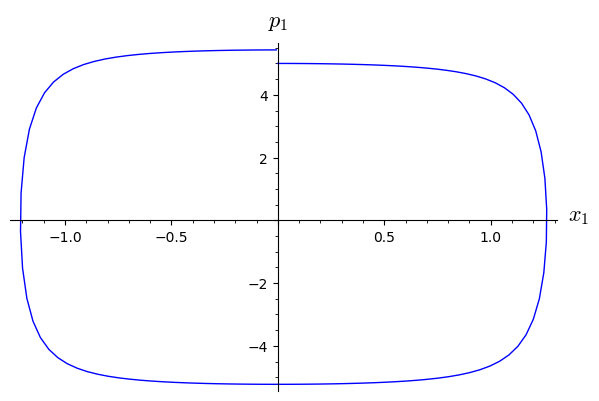

In [31]:
p = line(zip(sol[:,1],sol[:,0]), axes_labels=['$x_1$','$p_1$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

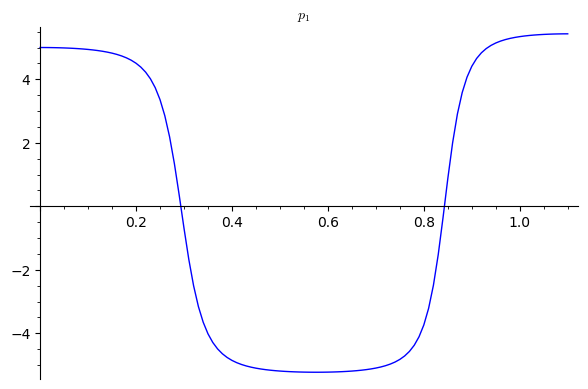

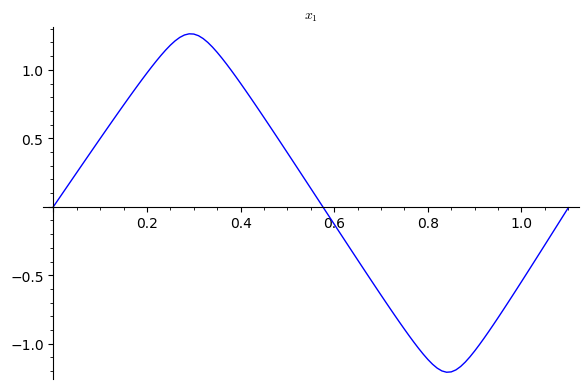

In [32]:
p = line(zip(times,sol[:,0]))
p.show(title="$p_1$")

p = line(zip(times,sol[:,1]))
p.show(title="$x_1$")

In [33]:
def make_energy_plot():
    previose_phi_value = 0
    E_t = []
    phi_t = [] # фаза процесса - отношение текущего импульса к координате
    phi2_t = [] # фаза процесса - отношение текущего импульса к координате
    phi_cycles = 0
    
    omega_t = []
    adiabatic_invariant_t = []
    
    for t_value, [p_value, x_value] in zip(times,sol):
        E_value = E_subs.subs(p_1 == p_value, X == x_value, t = t_value)
        phi_value = atan2(x_value, p_value)
        E_t += [[t_value, E_value]]
        phi_t += [[t_value, phi_value]]
        delta_phi = phi_value - previose_phi_value

        if delta_phi <= -(2*pi - 0.1):
            phi_cycles += 2* pi
        phi2_t += [[t_value, phi_value+phi_cycles]]
        
        if (t_value != 0):
            omega_value = (phi_value+phi_cycles) / t_value
            omega_t += [[t_value,omega_value]]
            
        if phi_cycles > 0:
            
            adiabatic_invariant_value = E_value / omega_value

            adiabatic_invariant_t += [[t_value, adiabatic_invariant_value]]

        previose_phi_value = phi_value
        

    p = line(E_t)
    p.show(title="$энергия\\,процесса$")

    #p = line(phi_t)
    #p.show(title="$фаза\\,процесса$")

    p = line(phi2_t)
    p.show(title="$фаза\\,процесса$")
    
    p = line(omega_t)
    p.show(title="$частота\\,процесса$")
    
    p = line(adiabatic_invariant_t)
    p.show(title="$адиабатический\\,инвариант\\,процесса$")

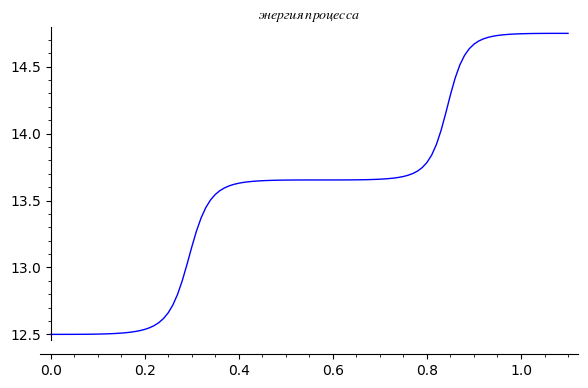

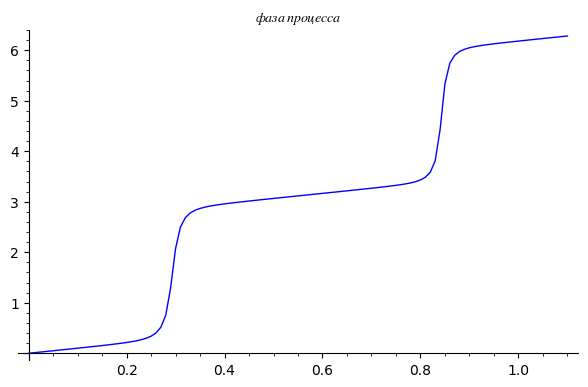

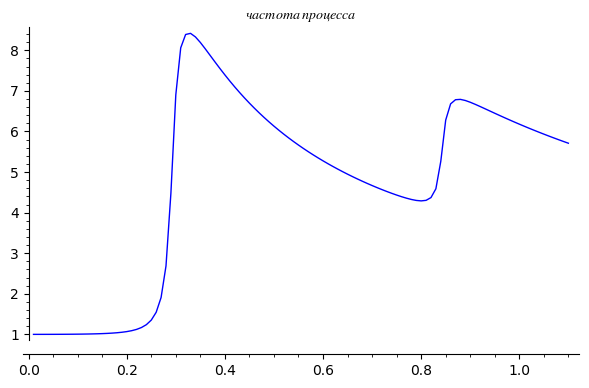

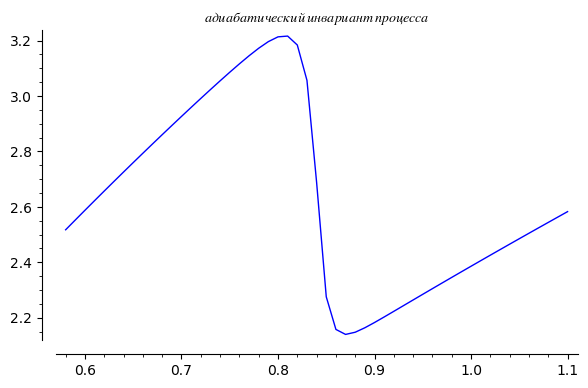

In [35]:
make_energy_plot()

In [36]:
times = srange(0, 24.01, 0.001)

sol = desolve_odeint(des=f, ics=[5,0], times=times, dvars=[p_1, X], ivar=t)

# Построение фазовых диаграмм ($v(p)$)

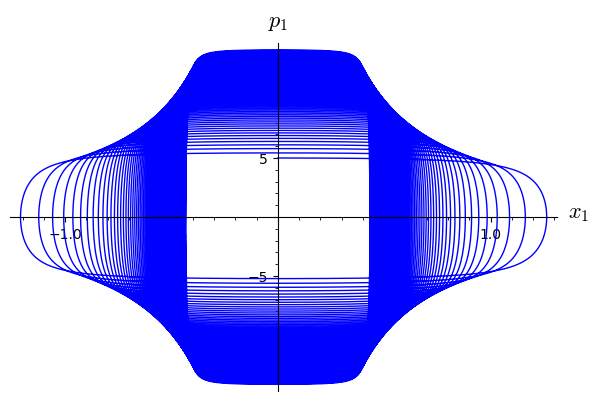

In [37]:
p = line(zip(sol[:,1],sol[:,0]), axes_labels=['$x_1$','$p_1$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

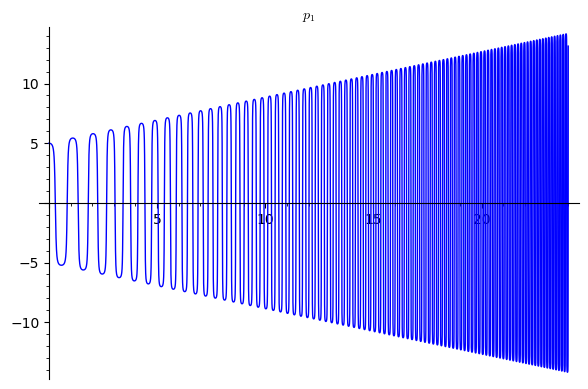

In [38]:
p = line(zip(times,sol[:,0]))
p.show(title="$p_1$")

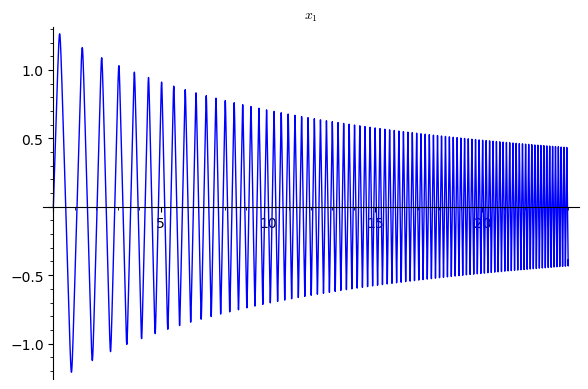

In [39]:
p = line(zip(times,sol[:,1]))
p.show(title="$x_1$")

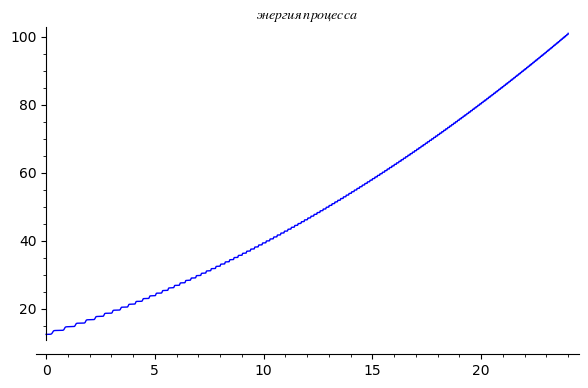

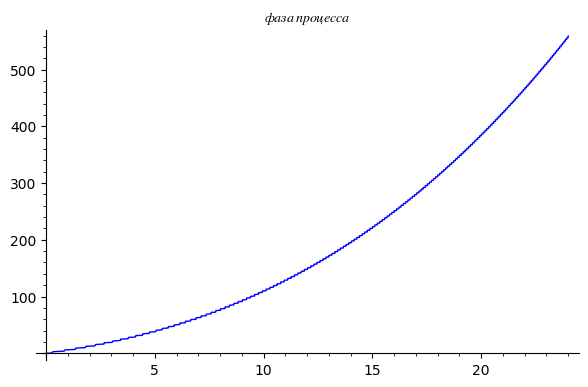

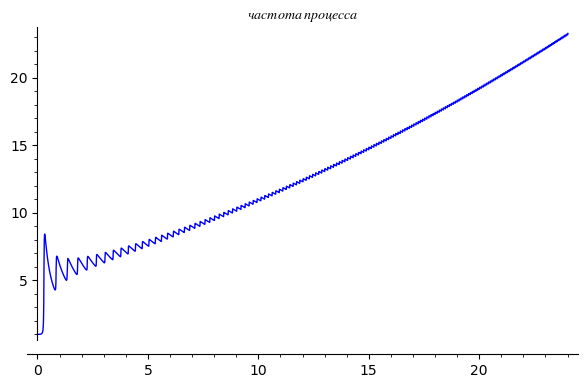

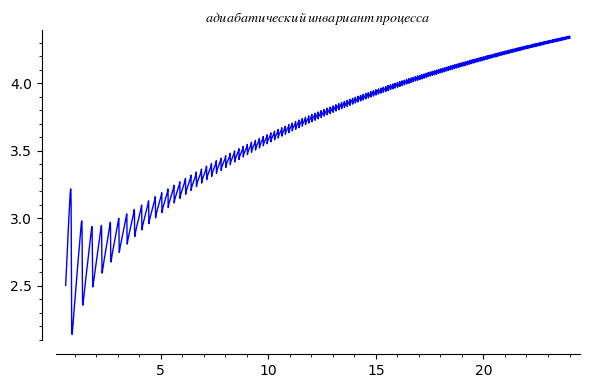

In [40]:
make_energy_plot()